# Poker Game Data Processing

Notebook for processing raw poker results data and visualising in various charts, tables, and graphs.

## Setup and Data Processing

In [1]:
import pandas as pd
import csv
import os
import numpy as np
from datetime import datetime, timedelta

In [2]:
path = os.getcwd() + "/dataset.csv"
data = pd.read_csv(path)

In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

df = data.groupby(['date','game_id','player', 'position']).sum() \
         .groupby(level=2).cumsum().reset_index()

df = df.sort_values(by=['date','game_id','position']).reset_index()

df = df[['date', 'game_id', 'player', 'position', 'points']]

df.head(20)

,date,game_id,player,position,points
0,2020-05-22,1,Steve,1,7
1,2020-05-22,1,Antoni,2,5
2,2020-05-22,1,Lowes,3,2
3,2020-05-22,1,Mellick,4,1
4,2020-05-22,1,Sam,5,0
5,2020-05-22,1,Robbo,6,0
6,2020-06-06,2,Mellick,1,8
7,2020-06-06,2,Sam,2,5
8,2020-06-06,2,Antoni,3,7
9,2020-06-06,2,Steve,4,8


## Visualising Results

In [4]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters as converter
import seaborn as sns; sns.set()
%matplotlib inline

#### Line Chart For Progress Over Time

In [5]:
# setting the figure size
plt.rcParams["figure.figsize"] = (26, 22)

# setting font family
plt.rcParams['font.family'] = 'CO59'

# plt.rcParams['lines.linewidth'] = 20
# plt.rcParams['lines.markersize'] = 1

# setting plot context
sns.set_context("poster")

findfont: Font family ['CO59'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CO59'] not found. Falling back to DejaVu Sans.
findfont: Font family ['CO59'] not found. Falling back to DejaVu Sans.


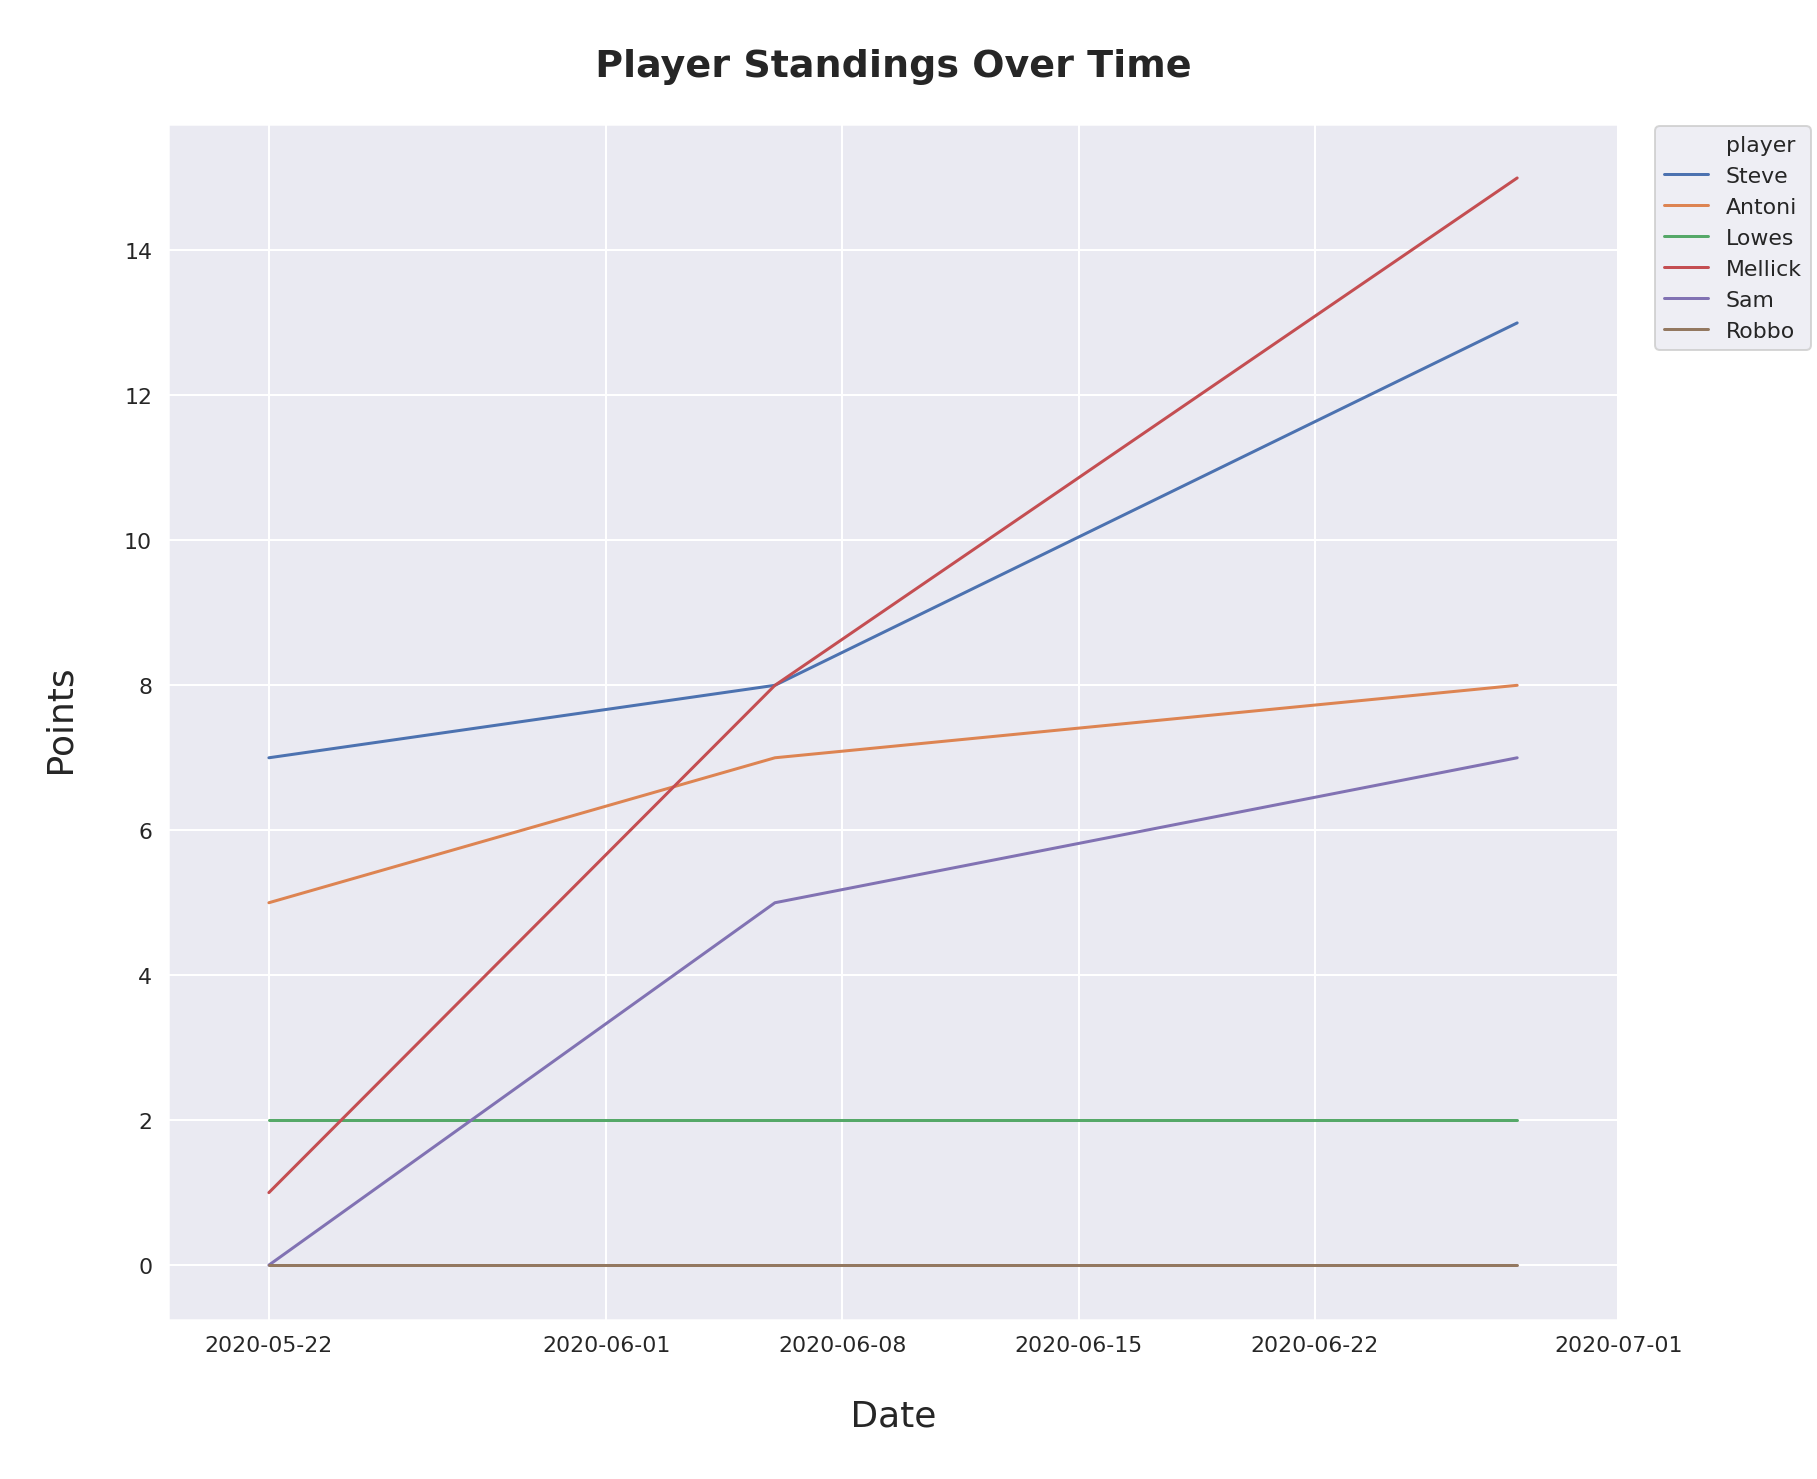

In [6]:
ax = sns.lineplot(x="date", 
                  y="points", 
                  hue="player", 
                  data=df,
                  dashes = True)

# adding labels to axis and title
ax.set_title('\n Player Standings Over Time \n', fontsize = 38, weight='bold')
ax.set_ylabel("\n Points \n", fontsize = 36)
ax.set_xlabel("\n Date \n", fontsize = 36)


min_date = min(df['date']) - timedelta(days=3)
max_date = max(df['date']) + timedelta(days=3)

plt.xlim(min_date, max_date)


# position legend to upper right of the plot and outside the x,y plane
ax.legend(loc='upper right', bbox_to_anchor=(1.14, 1.007), ncol=1)

plt.show()

#### Summary Table

In [7]:
df=data

# get unique player names as keys
players = df['player'].unique()
players = pd.DataFrame(players, columns=['player']) 

# getting player points
points = df.groupby('player').agg({'points': 'sum'})

# getting total games played
games_played = df[df['played'] > 0]
games_played = games_played["player"].value_counts()
games_played = games_played.to_frame(name='games_played')

# joining dataframes
result = players.join(games_played)
result = result.join(points).fillna(0)
result = pd.merge(points, games_played, left_index=True, right_index=True)

# getting points per game
result['ppg'] = round((result['points'] / result['games_played']),2)


# getting count of wins
wins = df[df['position'] == 1]
wins = wins['player'].value_counts()
wins = wins.to_frame(name='wins')

# join result df to wins
final_result = result.join(wins)

# format final result set for presentation in table format
table = final_result.fillna(0)
table['wins'] = table['wins'].astype('int64')
table['games_played'] = table['games_played'].astype('int64')
table = table[['games_played', 'points', 'ppg', 'wins']]
table=table.sort_values(by=['points'], ascending=False)
table.head(10)

,games_played,points,ppg,wins
Mellick,3,15,5.00,2
Steve,3,13,4.33,1
Antoni,3,8,2.67,0
Sam,2,7,3.50,0
Lowes,2,2,1.00,0
Robbo,1,0,0.00,0


In [13]:
df=data

# get unique player names as keys
players = df['player'].unique()
players = pd.DataFrame(players, columns=['player']) 

# getting player points
points = df.groupby('player').agg({'points': 'sum'})

df[df.played > 0]
# # getting total games played
# games_played = df[df['played'] > 0]
# games_played = games_played["player"].value_counts()
# games_played = games_played.to_frame(name='games_played')

,date,game_id,played,player,position,points
0,2020-05-22,1,1,Steve,1,7
1,2020-05-22,1,1,Antoni,2,5
2,2020-05-22,1,1,Lowes,3,2
3,2020-05-22,1,1,Mellick,4,1
6,2020-06-06,2,1,Mellick,1,7
7,2020-06-06,2,1,Sam,2,5
8,2020-06-06,2,1,Antoni,3,2
9,2020-06-06,2,1,Steve,4,1
12,2020-06-28,3,1,Mellick,1,7
13,2020-06-28,3,1,Steve,2,5
